# Finance Portfolio Optimization

This program optimize a users portfolio using the EF (Efficient Frontier).

In [1]:
pip install yfinance


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import yfinance as yf

plt.style.use('fivethirtyeight')

In [4]:
# Stock assets
assets = ["GOOGL", "AAPL", "AMZN", "META", "MSFT", "NVDA", "TSLA"]

num_stocks = len(assets)

#Weights
weights = np.ones(num_stocks) / num_stocks

In [5]:
# Portfolio starting date and ending date 
startDate = '2022-01-01'
today = datetime.today().strftime('%Y-%m-%d')

In [6]:
# Create data frame

df = pd.DataFrame()

for stock in assets: 
    df[stock] = yf.download(stock, start = startDate, end = today)['Close']
    
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


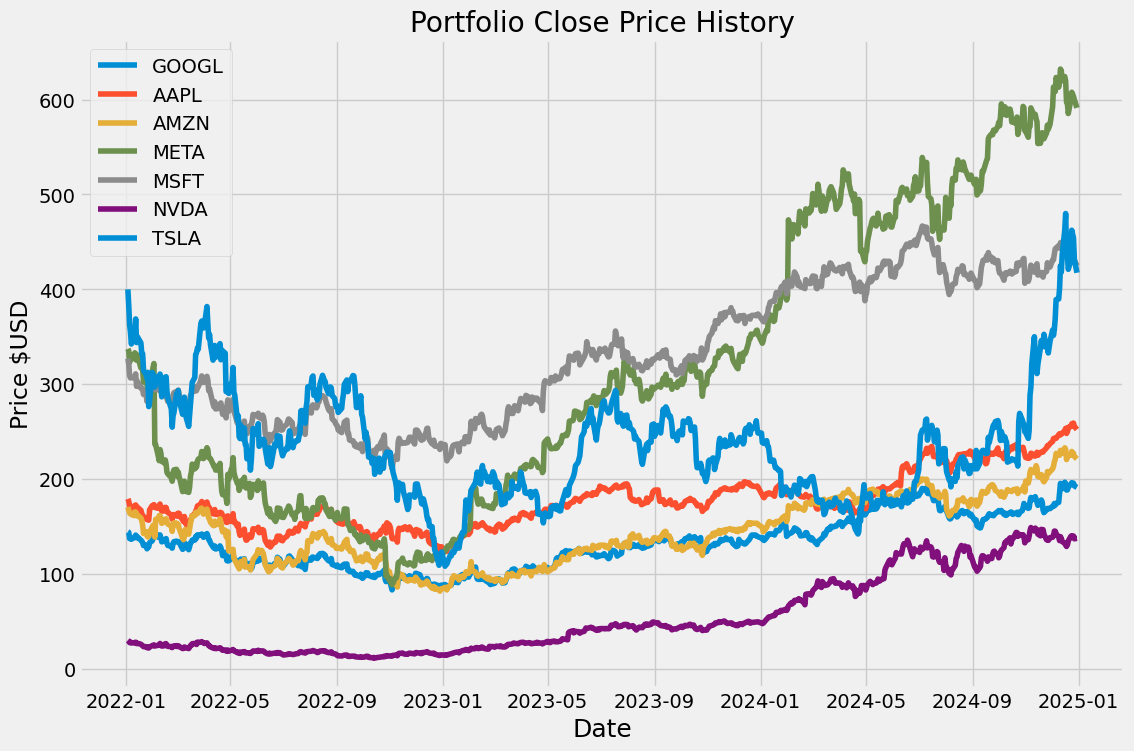

In [7]:
#Visualize
title = 'Portfolio Close Price History'

plt.figure(figsize = (12, 8))

for i in df.columns.values:
    plt.plot(df[i], label = i)

plt.title(title)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Price $USD")
plt.legend(df.columns.values, loc = 'upper left')
plt.show()

### Portfolio Annual Return

In [8]:
returns = df.pct_change()
cov_annual = returns.cov() * 252

port_variance = np.dot(weights.T, np.dot(cov_annual, weights))
port_volatility = np.sqrt(port_variance) #std.

portAnnualReturn = np.sum(returns.mean() * weights) * 252

### Simple Annual Calculation (Return, Volatility, Variance)

In [9]:
print(f"Expected annual return: {str(round(port_variance, 2)*100)}%")
print(f"Annual volatility: {str(round(port_volatility, 2)*100)}%")
print(f"Annual variance: {str(round(portAnnualReturn, 2)*100)}%")

Expected annual return: 10.0%
Annual volatility: 32.0%
Annual variance: 25.0%


### Optimize Portfolio

In [11]:
pip install PyPortfolioOpt


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
from pypfopt import risk_models, expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [15]:
# Expected returns and annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cln_weights = ef.clean_weights()

print(cln_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('GOOGL', 0.0), ('AAPL', 0.0), ('AMZN', 0.0), ('META', 0.0), ('MSFT', 0.0), ('NVDA', 1.0), ('TSLA', 0.0)])
Expected annual return: 66.5%
Annual volatility: 55.3%
Sharpe Ratio: 1.20


(0.6653518536770225, 0.5528742398920389, 1.2034415888266876)

In [17]:
# Discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cln_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 15000)

allocation, leftover = da.lp_portfolio()

print(f"Discrete allocation:{allocation}")
print(f"Funds remaining: ${round(leftover,2)}")

Discrete allocation:{'NVDA': 109}
Funds remaining: $13.59
